## Continuous Time Models

#### Weiner process
$$
\{W_t\}_{t \geq 0}, \quad W_t = W_{t - \Delta t} + \epsilon_t \sqrt{\Delta t}, \quad \epsilon_t \sim \mathcal{N}(0, 1)
$$

or equivalently,

$$
\Delta W_t := W_t - W_{t - \Delta t} \sim \mathcal{N}(0, \Delta t)
$$

where
$$
\mathbb{E}[W_t - W_0] = 0 \quad \text{and} \quad \mathrm{Var}[W_t - W_0] = \sum_{i=1}^T \Delta t = T \cdot \Delta t = t
$$

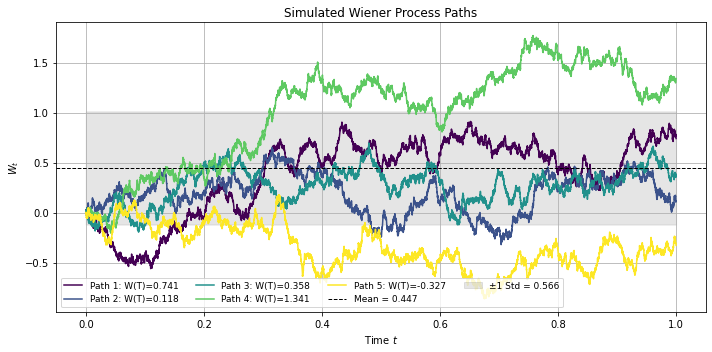

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0
dt = 1e-4
N = int(T / dt)
t = np.linspace(0, T, N+1)

# Simulate 5 paths
num_paths = 5
paths = []

for _ in range(num_paths):
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    W = np.concatenate(([0], np.cumsum(dW)))  # W_0 = 0
    paths.append(W)

# Convert to numpy array for easier manipulation
paths = np.array(paths)

# Final values for stats
final_vals = paths[:, -1]
mean_final = np.mean(final_vals)
std_final = np.std(final_vals)

# Plot
plt.figure(figsize=(10, 5))
colors = plt.cm.viridis(np.linspace(0, 1, num_paths))

for i in range(num_paths):
    label = f'Path {i+1}: W(T)={paths[i, -1]:.3f}'
    plt.plot(t, paths[i], color=colors[i], label=label)

# Annotate mean and std
plt.axhline(mean_final, color='black', linestyle='--', linewidth=1, label=f"Mean = {mean_final:.3f}")
plt.fill_between(t, mean_final - std_final, mean_final + std_final, color='gray', alpha=0.2, label=f"±1 Std = {std_final:.3f}")

# Formatting
plt.title("Simulated Wiener Process Paths")
plt.xlabel("Time $t$")
plt.ylabel("$W_t$")
plt.grid(True)
plt.legend(loc='lower left', fontsize=9, ncol = 4)
plt.tight_layout()
plt.show()


### Generalized Wiener Process

The generalized Wiener process is defined as:

$dx_t = \mu \, dt + \sigma \, dW_t$

Integrating from $0$ to $t$ gives:

$x_t = x_0 + \mu t + \sigma W_t$

In discrete time with step size $\Delta t$, this becomes:

$x_t - x_0 = \sum_{i=1}^{t/\Delta t} \mu \Delta t + \sigma \sum_{i=1}^{t/\Delta t} \mathcal{N}(0, \Delta t)$

which implies:

$x_t - x_0 = \mu t + \sigma (W_t - W_0)$

since $W_t - W_0$ is the sum of independent normal increments with variance $\Delta t$.


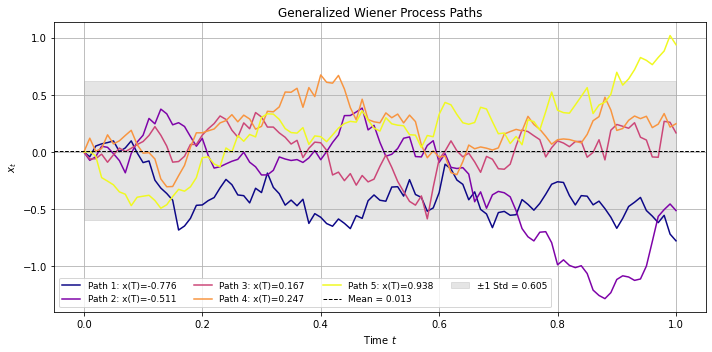

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0
dt = 0.01
N = int(T / dt)
t = np.linspace(0, T, N + 1)

mu = 0.5
sigma = 1.0
num_paths = 5
x0 = 0

paths = []

for _ in range(num_paths):
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    dx = mu * dt + sigma * dW
    x = np.concatenate(([x0], np.cumsum(dx)))
    paths.append(x)

paths = np.array(paths)

# Empirical stats at final time
final_vals = paths[:, -1]
mean_final = np.mean(final_vals)
std_final = np.std(final_vals)

# Plot
plt.figure(figsize=(10, 5))
colors = plt.cm.plasma(np.linspace(0, 1, num_paths))

for i in range(num_paths):
    label = f'Path {i+1}: x(T)={paths[i, -1]:.3f}'
    plt.plot(t, paths[i], color=colors[i], label=label)

# Add mean line and ±1 std band
plt.axhline(mean_final, color='black', linestyle='--', linewidth=1, label=f"Mean = {mean_final:.3f}")
plt.fill_between(t, mean_final - std_final, mean_final + std_final, color='gray', alpha=0.2, label=f"±1 Std = {std_final:.3f}")

plt.title("Generalized Wiener Process Paths")
plt.xlabel("Time $t$")
plt.ylabel("$x_t$")
plt.grid(True)
plt.legend(loc='lower left', fontsize=9,ncol = 4)
plt.tight_layout()
plt.show()


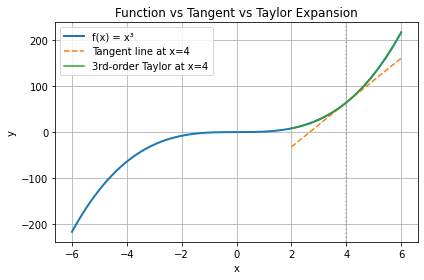

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-6, 6, 400)
f = x1**3

x2 = np.linspace(2, 6, 400)
# Derivative (tangent line) at x=4
L = 64 + 48 * (x2 - 4)

# Taylor expansion up to 3rd order
P = 64 + 48*(x2 - 4) + 12*(x2 - 4)**2 + (x2 - 4)**3

plt.plot(x1, f, label='f(x) = x³', linewidth=2)
plt.plot(x2, L, '--', label='Tangent line at x=4')
plt.plot(x2, P, label='3rd-order Taylor at x=4')
plt.axvline(4, color='gray', linestyle=':', alpha=0.5)
plt.legend()
plt.grid(True)
plt.title("Function vs Tangent vs Taylor Expansion")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()


## Itô's Lemma

Assume $x_t$ satisfies the stochastic differential equation:  
$dx_t = \mu(x_t, t)\,dt + \sigma(x_t, t)\,dW_t$  

Then for any function $G(x_t, t)$, Itô's Lemma gives:  
$dG = \left[ \frac{\partial G}{\partial x} \mu(x_t, t) + \frac{\partial G}{\partial t} + \frac{1}{2} \frac{\partial^2 G}{\partial x^2} \sigma^2(x_t, t) \right] dt + \frac{\partial G}{\partial x} \sigma(x_t, t)\,dW_t$

---

### Ex 1: $G(w_t, t) = w_t^2$

Here $w_t$ is standard Brownian motion, so $dw_t = dW_t$, $\mu = 0$, and $\sigma = 1$.

- $\frac{\partial G}{\partial t} = 0$
- $\frac{\partial G}{\partial w_t} = 2w_t$
- $\frac{\partial^2 G}{\partial w_t^2} = 2$

Then:  
$dG = \left[ 0 + 0 + \frac{1}{2}(2)(1)^2 \right] dt + 2w_t \cdot 1 \cdot dW_t = dt + 2w_t\,dW_t$

✅ So: $d(w_t^2) = 2w_t\,dW_t + dt$

---

### Ex 2: $g(P_t, t) = \ln(P_t)$, where $P_t = x_t$

Assume $dx_t = \mu x_t\,dt + \sigma x_t\,dW_t$ (geometric Brownian motion).

- $\frac{\partial g}{\partial t} = 0$
- $\frac{\partial g}{\partial x} = \frac{1}{x_t}$
- $\frac{\partial^2 g}{\partial x^2} = -\frac{1}{x_t^2}$

Apply Itô’s Lemma:

$d(\ln x_t) = \left[ \frac{1}{x_t} \mu x_t + 0 + \frac{1}{2} (-\frac{1}{x_t^2}) \sigma^2 x_t^2 \right] dt + \frac{1}{x_t} \sigma x_t\,dW_t$

Simplify:

$d(\ln x_t) = \left[ \mu - \frac{1}{2} \sigma^2 \right] dt + \sigma\,dW_t$

So: $d(\ln x_t) = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma\,dW_t$


## Geometric Brownian Motion — Full Itô Derivation

Assume the process $x_t$ follows the SDE:

$$
dx_t = \mu x_t\,dt + \sigma x_t\,dW_t
$$

We want to solve for $x_t$. Define $f(x_t) = \ln x_t$ and apply Itô's Lemma:

$$
df = \left( \frac{\partial f}{\partial t} + \mu x_t \cdot \frac{\partial f}{\partial x} + \frac{1}{2} \sigma^2 x_t^2 \cdot \frac{\partial^2 f}{\partial x^2} \right) dt + \sigma x_t \cdot \frac{\partial f}{\partial x} \, dW_t
$$

Compute the derivatives:

- $\frac{\partial f}{\partial x} = \frac{1}{x_t}$
- $\frac{\partial^2 f}{\partial x^2} = -\frac{1}{x_t^2}$

Substitute:

$$
d(\ln x_t) = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma\,dW_t
$$

Now integrate both sides from $0$ to $t$:

$$
\ln x_t - \ln x_0 = \left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma W_t
$$

Exponentiate both sides:

$$
x_t = x_0 \cdot \exp\left( \left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma W_t \right)
$$



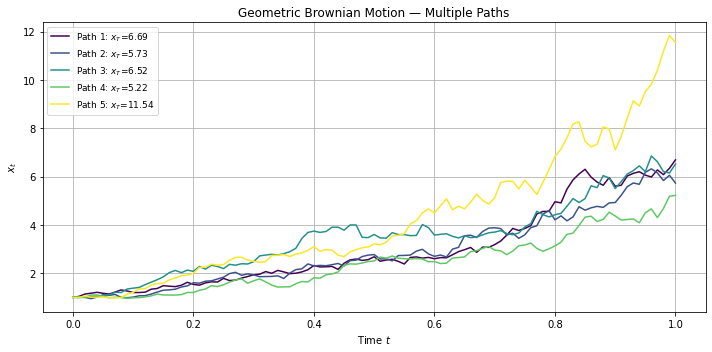

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0       # total time
dt = 0.01     # step size
N = int(T / dt)  # number of steps
mu = 2
sigma = 0.5
x0 = 1
num_paths = 5  # number of GBM paths

t = np.linspace(0, T, N + 1)
paths = []

for _ in range(num_paths):
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    W = np.concatenate(([0], np.cumsum(dW)))
    x = x0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    paths.append(x)

paths = np.array(paths)

# Plotting
plt.figure(figsize=(10, 5))
colors = plt.cm.viridis(np.linspace(0, 1, num_paths))

for i in range(num_paths):
    plt.plot(t, paths[i], color=colors[i], label=f'Path {i+1}: $x_T$={paths[i, -1]:.2f}')

plt.title("Geometric Brownian Motion — Multiple Paths")
plt.xlabel("Time $t$")
plt.ylabel("$x_t$")
plt.grid(True)
plt.legend(loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()
